<center><h1> Spotify Data Exploration </h1>


**Autor:**
    Thaís Marins

**Base de dados utilizada:**
   [ Spotify Tracks Dataset by Kaggle](https://www.kaggle.com/datasets/maharshipandya/-spotify-tracks-dataset?utm_source=ActiveCampaign&utm_medium=email&utm_content=%237DaysOfCode+-+Machine+Learning+1%2F7%3A+Coleta+de+dados+e+An%C3%A1lise+Explorat%C3%B3ria&utm_campaign=%5BAlura+%237Days+Of+Code%5D%28Js+e+DOM+-+3%C2%AA+Ed+%29+1%2F7)


Análise exploratória dos dados do Spotify aplicando técnicas de *Machine Learning* para prever a popularidade musical. 
</center>


#### **Desenvolvimento do Projeto**

Desafio #7DaysOfCode proporcionado pela Alura para incentivar a prática dos estudos de *Machine Learning*.


**Tecnologias utilizadas:**
    Python, Jupyter Notebook, Machine Learning, Análise de Dados
    
    
**Bibliotecas utilizadas:**
    Pandas, Numpy, Matplotlib, Seaborn, Scikit-Learn, Keras

**Motivação:**
     Com o projeto é possível identificar características musicais que estão correlacionadas com a popularidade e, assim, criar músicas com maior potencial de sucesso. Além disso, a  popularidade pode ser útil para os usuários do Spotify, pois pode ajudá-los a descobrir novas músicas e artistas de seu interesse com base nos gostos musicais.


* **Dia 01:** Coleta de dados e Análise Exploratória
* **Dia 02:** Entendendo conceitos iniciais de Machine Learning e Pré-Processamento de Dados
* **Dia 03:** Divisão dos dados e validação cruzada
* **Dia 04:** Definindo a baseline e treinando o primeiro modelo
* **Dia 05:** Validação de modelos de Machine Learning
* **Dia 06:** Reamostragem de dados
* **Dia 07:** Aplicando o modelo nos dados de teste e salvando os resultados



## **Coleta de Dados**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patches as mpatches

In [4]:
data = pd.read_csv("dataset.csv")
data.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [13]:
# dimensões
print("Numero de linhas e colunas respectivamente:", data.shape)

Numero de linhas e colunas respectivamente: (114000, 21)


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [15]:
data.describe()

,Unnamed: 0,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,56999.500000,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,32909.109681,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28499.750000,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,56999.500000,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,85499.250000,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,113999.000000,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


In [25]:
print(data['artists'].unique().shape)
print(data['artists'].value_counts())


(31438,)
The Beatles                                                                 279
George Jones                                                                271
Stevie Wonder                                                               236
Linkin Park                                                                 224
Ella Fitzgerald                                                             222
                                                                           ... 
Automatic Tasty                                                               1
o9                                                                            1
Pyotr Ilyich Tchaikovsky;National Philharmonic Orchestra;Richard Bonynge      1
tstewart;Ólafur Arnalds                                                       1
Jesus Culture                                                                 1
Name: artists, Length: 31437, dtype: int64


The Beatles        279
George Jones       271
Stevie Wonder      236
Linkin Park        224
Ella Fitzgerald    222
Prateek Kuhad      217
Feid               202
Chuck Berry        190
Håkan Hellström    183
OneRepublic        181
Name: artists, dtype: int64


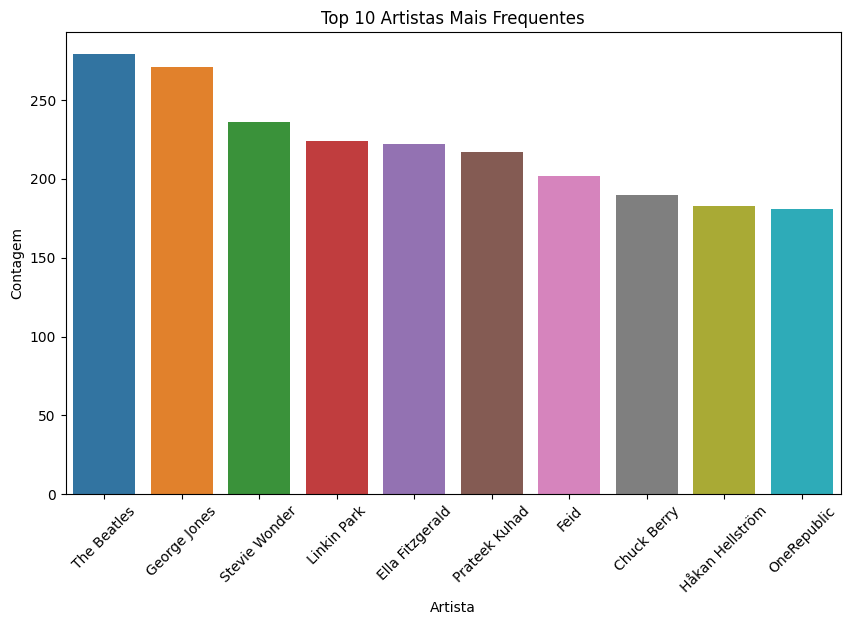

In [29]:
#top10 artistas
print(data['artists'].value_counts().head(10))
plt.figure(figsize=(10,6))
sns.barplot(x=data['artists'].value_counts().head(10).index, y=data['artists'].value_counts().head(10).values)
plt.xticks(rotation=45)
plt.xlabel('Artista')
plt.ylabel('Contagem')
plt.title('Top 10 Artistas Mais Frequentes')
plt.show()

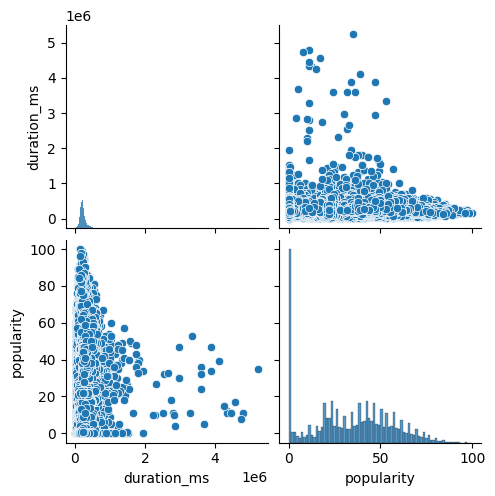

In [31]:
numeric_features = ['duration_ms', 'popularity']
data_numeric = data[numeric_features]
sns.pairplot(data_numeric)
plt.show()

In [33]:
# Média de popularidade das músicas
media_popularidade = data['popularity'].mean()
print("Média de popularidade das músicas:", media_popularidade)

Média de popularidade das músicas: 33.2385350877193


In [35]:
# Quantidade de músicas explícitas e não explícitas
musicas_explicitas = data[data['explicit'] == True].shape[0]
musicas_nao_explicitas = data['explicit'] == False.shape[0]
print("Músicas explícitas:", musicas_explicitas)
print("Músicas não explícitas:", musicas_nao_explicitas)

AttributeError: 'bool' object has no attribute 'shape'

In [37]:
# Distribuição dos gêneros musicais
contagem_generos = data['track_genre'].value_counts()
print("Distribuição dos gêneros musicais:")
print(contagem_generos)

Distribuição dos gêneros musicais:
acoustic             1000
punk-rock            1000
progressive-house    1000
power-pop            1000
pop                  1000
                     ... 
folk                 1000
emo                  1000
electronic           1000
electro              1000
world-music          1000
Name: track_genre, Length: 114, dtype: int64


In [38]:
# Correlação entre atributos musicais
atributos_musicais = df[['danceability', 'energy', 'loudness']]
matriz_correlacao = atributos_musicais.corr()
print("Matriz de correlação:")
print(matriz_correlacao)

NameError: name 'df' is not defined

In [40]:

# Estatísticas descritivas da duração das músicas por gênero
estatisticas_duracao = data.groupby('track_genre')['duration_ms'].describe()
print("Estatísticas descritivas da duração das músicas por gênero:")
print(estatisticas_duracao)

Estatísticas descritivas da duração das músicas por gênero:
              count        mean            std      min        25%       50%  \
track_genre                                                                    
acoustic     1000.0  214896.957   55615.279398  59823.0  178664.25  214822.0   
afrobeat     1000.0  248412.791   94681.036091  31824.0  194293.00  230906.5   
alt-rock     1000.0  235455.907   58622.027206  84973.0  200373.00  229585.5   
alternative  1000.0  222016.180   56439.461679  84973.0  184003.00  216093.5   
ambient      1000.0  237059.038  110874.907283  41904.0  162709.25  219880.0   
...             ...         ...            ...      ...        ...       ...   
techno       1000.0  312311.477  109575.848476  68390.0  218056.25  296236.0   
trance       1000.0  269007.478  120556.855725  30474.0  183322.75  229206.5   
trip-hop     1000.0  274954.026  101260.048311  37626.0  214845.50  256429.5   
turkish      1000.0  219529.010   55225.248573  70893.0  183